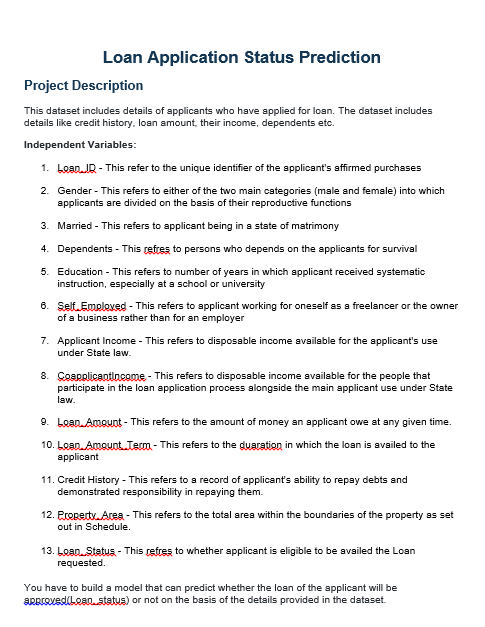
Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, classification_report, accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score

from 

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Define the new column names
new_column_names = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
    'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 
    'Credit_History', 'Property_Area', 'Loan_Status'
]

# Rename the columns
df.columns = new_column_names

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [ ]:
# there are nun values in many columns also many columns are object columns

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
df['Gender'].value_counts()

Gender
Male      488
Female    112
Name: count, dtype: int64

In [ ]:
For categorical columns (object type): Use the most frequent value (mode) or a placeholder like 'Unknown'.
For numerical columns: Use the mean, median, or a placeholder value like 0.

In [10]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
# Fill missing values in numerical columns with the median
numerical_columns = ['Loan_Amount', 'Loan_Amount_Term', 'Credit_History']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('-------')

Loan_ID
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64
-------
Gender
Male      501
Female    112
Name: count, dtype: int64
-------
Married
Yes    401
No     212
Name: count, dtype: int64
-------
Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64
-------
Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64
-------
Self_Employed
No     531
Yes     82
Name: count, dtype: int64
-------
ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64
-------
CoapplicantIncome
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
-------
Loan_Amount
128.0    32
120

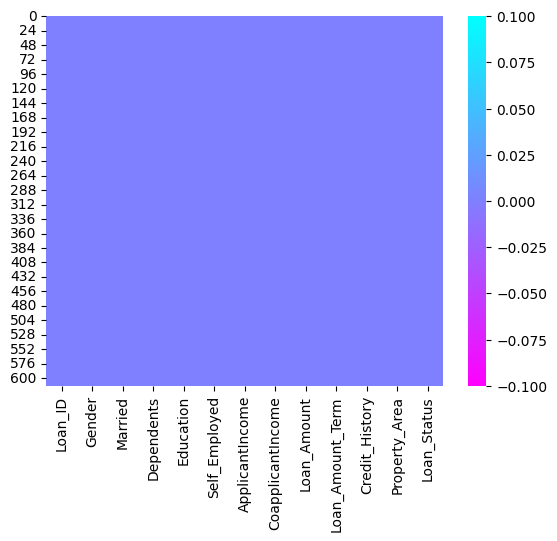

In [16]:
#lets check the null value again
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.heatmap(df.isnull(), cmap='cool_r')
plt.show()

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
# sapreating numerical and categorical columns

# checking for categorical columns

cat_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('cat_co: ',cat_col)
print('/n')
    
# Num column

num_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num_co: ',num_col)
print('/n')
        

cat_co:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
/n
num_co:  ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']
/n


In [20]:
# checking the unique value in each column 
df.nunique().to_frame('No. of unique values')

,No. of unique values
Loan_ID,613
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,504
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10


In [21]:
# There are unique values present in the Loan ID hence the customer  has the unique Loan ID can be drop

df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [22]:
#checking the unique value in target
df['Loan_Status'].value_counts()  # No mean no chrun and Yes means churned 

Loan_Status
Y    421
N    192
Name: count, dtype: int64

In [23]:
# statstical summary of numerical column 
df.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,145.781403,342.381729,0.854812
std,6114.004114,2927.903583,84.172857,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


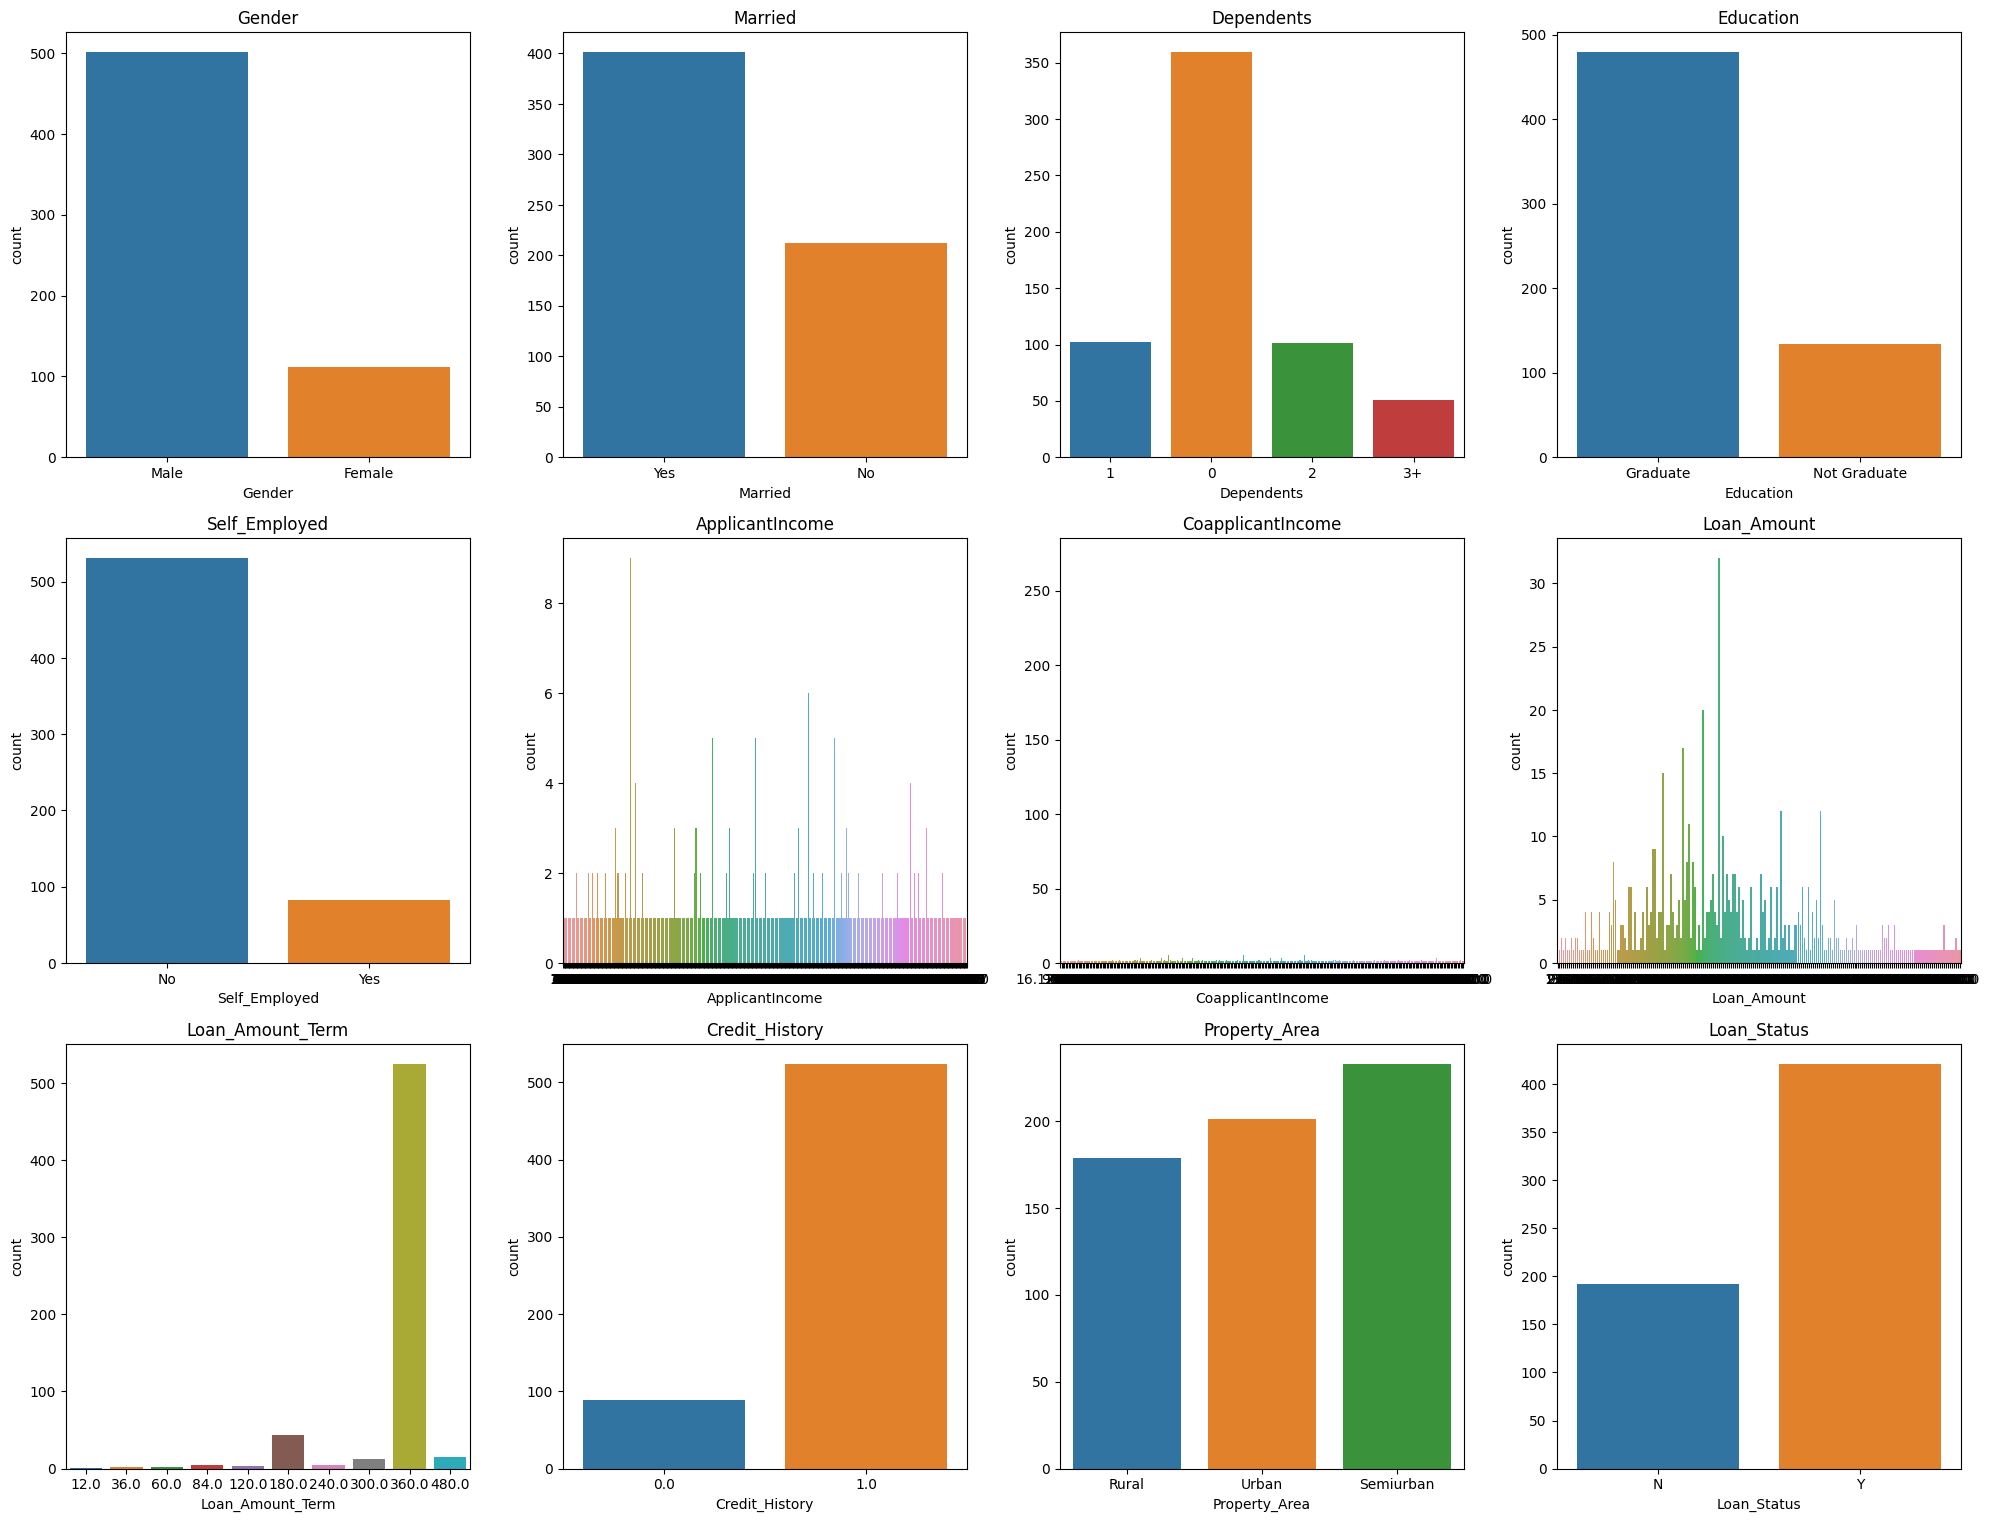

In [29]:
# Define your categorical columns
cat_co = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Create the figure
plt.figure(figsize=(20,25), facecolor='white')

p = 1
for i in df.columns:
    plt.subplot(5, 4, p)
    sns.countplot(x=i, data=df)
    plt.title(i)
    p += 1

plt.tight_layout()
plt.show()

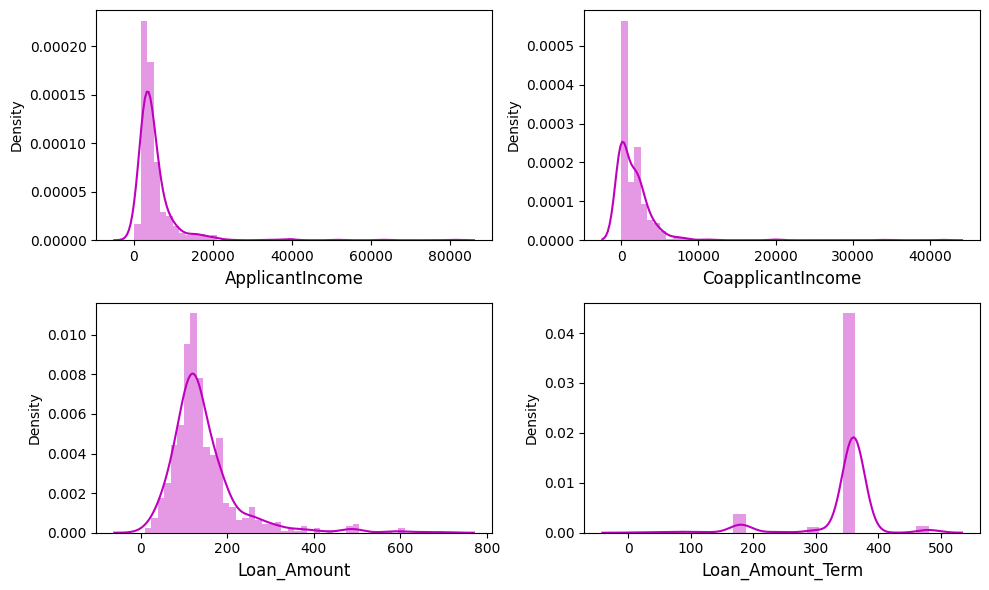

In [31]:
# lets check how the data is distributed 
# Define numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in num_cols:
    if plotnumber<=4:
        axs=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

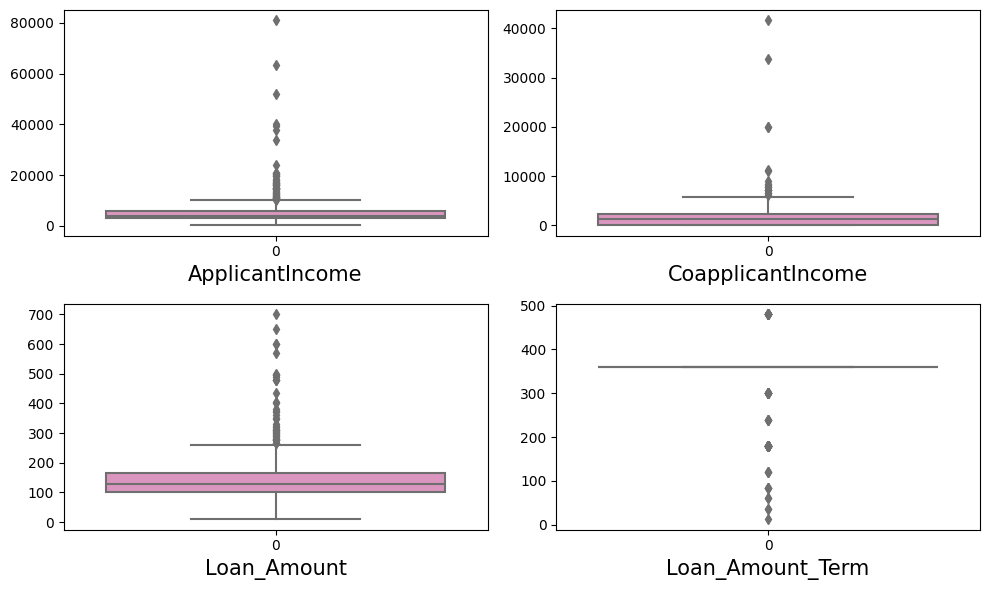

In [32]:
# lets check the outliars
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1

for col in num_cols:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [33]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df
    

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
609,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
610,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
611,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [34]:
df.skew() # those <0.5 & < -0.5 are skewed , those columns which were categorical column can be ignored

Gender              -1.646215
Married             -0.649810
Dependents           1.013119
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      6.534654
CoapplicantIncome    7.488653
Loan_Amount          2.740108
Loan_Amount_Term    -2.399297
Credit_History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [ ]:
#'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' are the cat column hence no need
 to remove skewness 
# we will go to remove the skewness only from num-col which is 'ApplicantIncome','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit_History'

In [ ]:
'ApplicantIncome','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit_History'

In [36]:
#Removing the sewness using cuberoot method
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [37]:
#Removing the sewness using cuberoot method
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])

In [38]:
#Removing the sewness using cuberoot method
df['Loan_Amount']=np.cbrt(df['Loan_Amount'])

In [39]:
#Removing the sewness using cuberoot method
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])

In [40]:
#Removing the sewness using cuberoot method
df['Credit_History']=np.cbrt(df['Credit_History'])

In [41]:
df.skew()

Gender              -1.646215
Married             -0.649810
Dependents           1.013119
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      2.084461
CoapplicantIncome    0.193845
Loan_Amount          0.861588
Loan_Amount_Term    -3.574548
Credit_History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [43]:
df.info() # we have converted categorical coulmn to numeric column by using OrdinalEncoder(OE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    float64
 1   Married            613 non-null    float64
 2   Dependents         613 non-null    float64
 3   Education          613 non-null    float64
 4   Self_Employed      613 non-null    float64
 5   ApplicantIncome    613 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        613 non-null    float64
 8   Loan_Amount_Term   613 non-null    float64
 9   Credit_History     613 non-null    float64
 10  Property_Area      613 non-null    float64
 11  Loan_Status        613 non-null    float64
dtypes: float64(12)
memory usage: 57.6 KB


In [44]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,613.000000,613.00000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.817292,0.65416,0.745514,0.218597,0.133768,16.518064,7.493130,5.117611,6.951941,0.854812,1.035889,0.686786
std,0.386743,0.47603,1.009999,0.413632,0.340681,3.941981,7.108034,0.855376,0.584244,0.352578,0.787163,0.464179
min,0.000000,0.00000,0.000000,0.000000,0.000000,5.313293,0.000000,2.080084,2.289428,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,14.220983,0.000000,4.641589,7.113787,1.000000,0.000000,0.000000
50%,1.000000,1.00000,0.000000,0.000000,0.000000,15.621316,10.656022,5.039684,7.113787,1.000000,1.000000,1.000000
75%,1.000000,1.00000,1.000000,0.000000,0.000000,17.946342,13.203886,5.484807,7.113787,1.000000,2.000000,1.000000
max,1.000000,1.00000,3.000000,1.000000,1.000000,43.267487,34.668156,8.879040,7.829735,1.000000,2.000000,1.000000


In [45]:
# Checking the corelation between feature and target

cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366255,0.173591,0.045790,-0.000223,0.074841,0.209256,0.134742,-0.063080,0.008855,-0.026732,0.017477
Married,0.366255,1.000000,0.333224,0.011141,0.003616,0.035457,0.278434,0.173819,-0.081386,0.011880,0.007014,0.093165
Dependents,0.173591,0.333224,1.000000,0.055153,0.056358,0.123004,-0.005527,0.164067,-0.091190,-0.039687,0.001230,0.010939
Education,0.045790,0.011141,0.055153,1.000000,-0.010725,-0.181162,0.009718,-0.161512,-0.069507,-0.073330,-0.064282,-0.085354
Self_Employed,-0.000223,0.003616,0.056358,-0.010725,1.000000,0.188782,-0.075489,0.115007,-0.029741,-0.001287,-0.030117,-0.003270
ApplicantIncome,0.074841,0.035457,0.123004,-0.181162,0.188782,1.000000,-0.324745,0.555819,-0.024001,0.009684,-0.025620,0.003924
CoapplicantIncome,0.209256,0.278434,-0.005527,0.009718,-0.075489,-0.324745,1.000000,0.160309,0.000760,0.005752,-0.050323,0.034785
Loan_Amount,0.134742,0.173819,0.164067,-0.161512,0.115007,0.555819,0.160309,1.000000,0.070515,-0.010429,-0.079927,-0.038731
Loan_Amount_Term,-0.063080,-0.081386,-0.091190,-0.069507,-0.029741,-0.024001,0.000760,0.070515,1.000000,-0.010581,-0.082553,-0.012952
Credit_History,0.008855,0.011880,-0.039687,-0.073330,-0.001287,0.009684,0.005752,-0.010429,-0.010581,1.000000,0.001143,0.540378


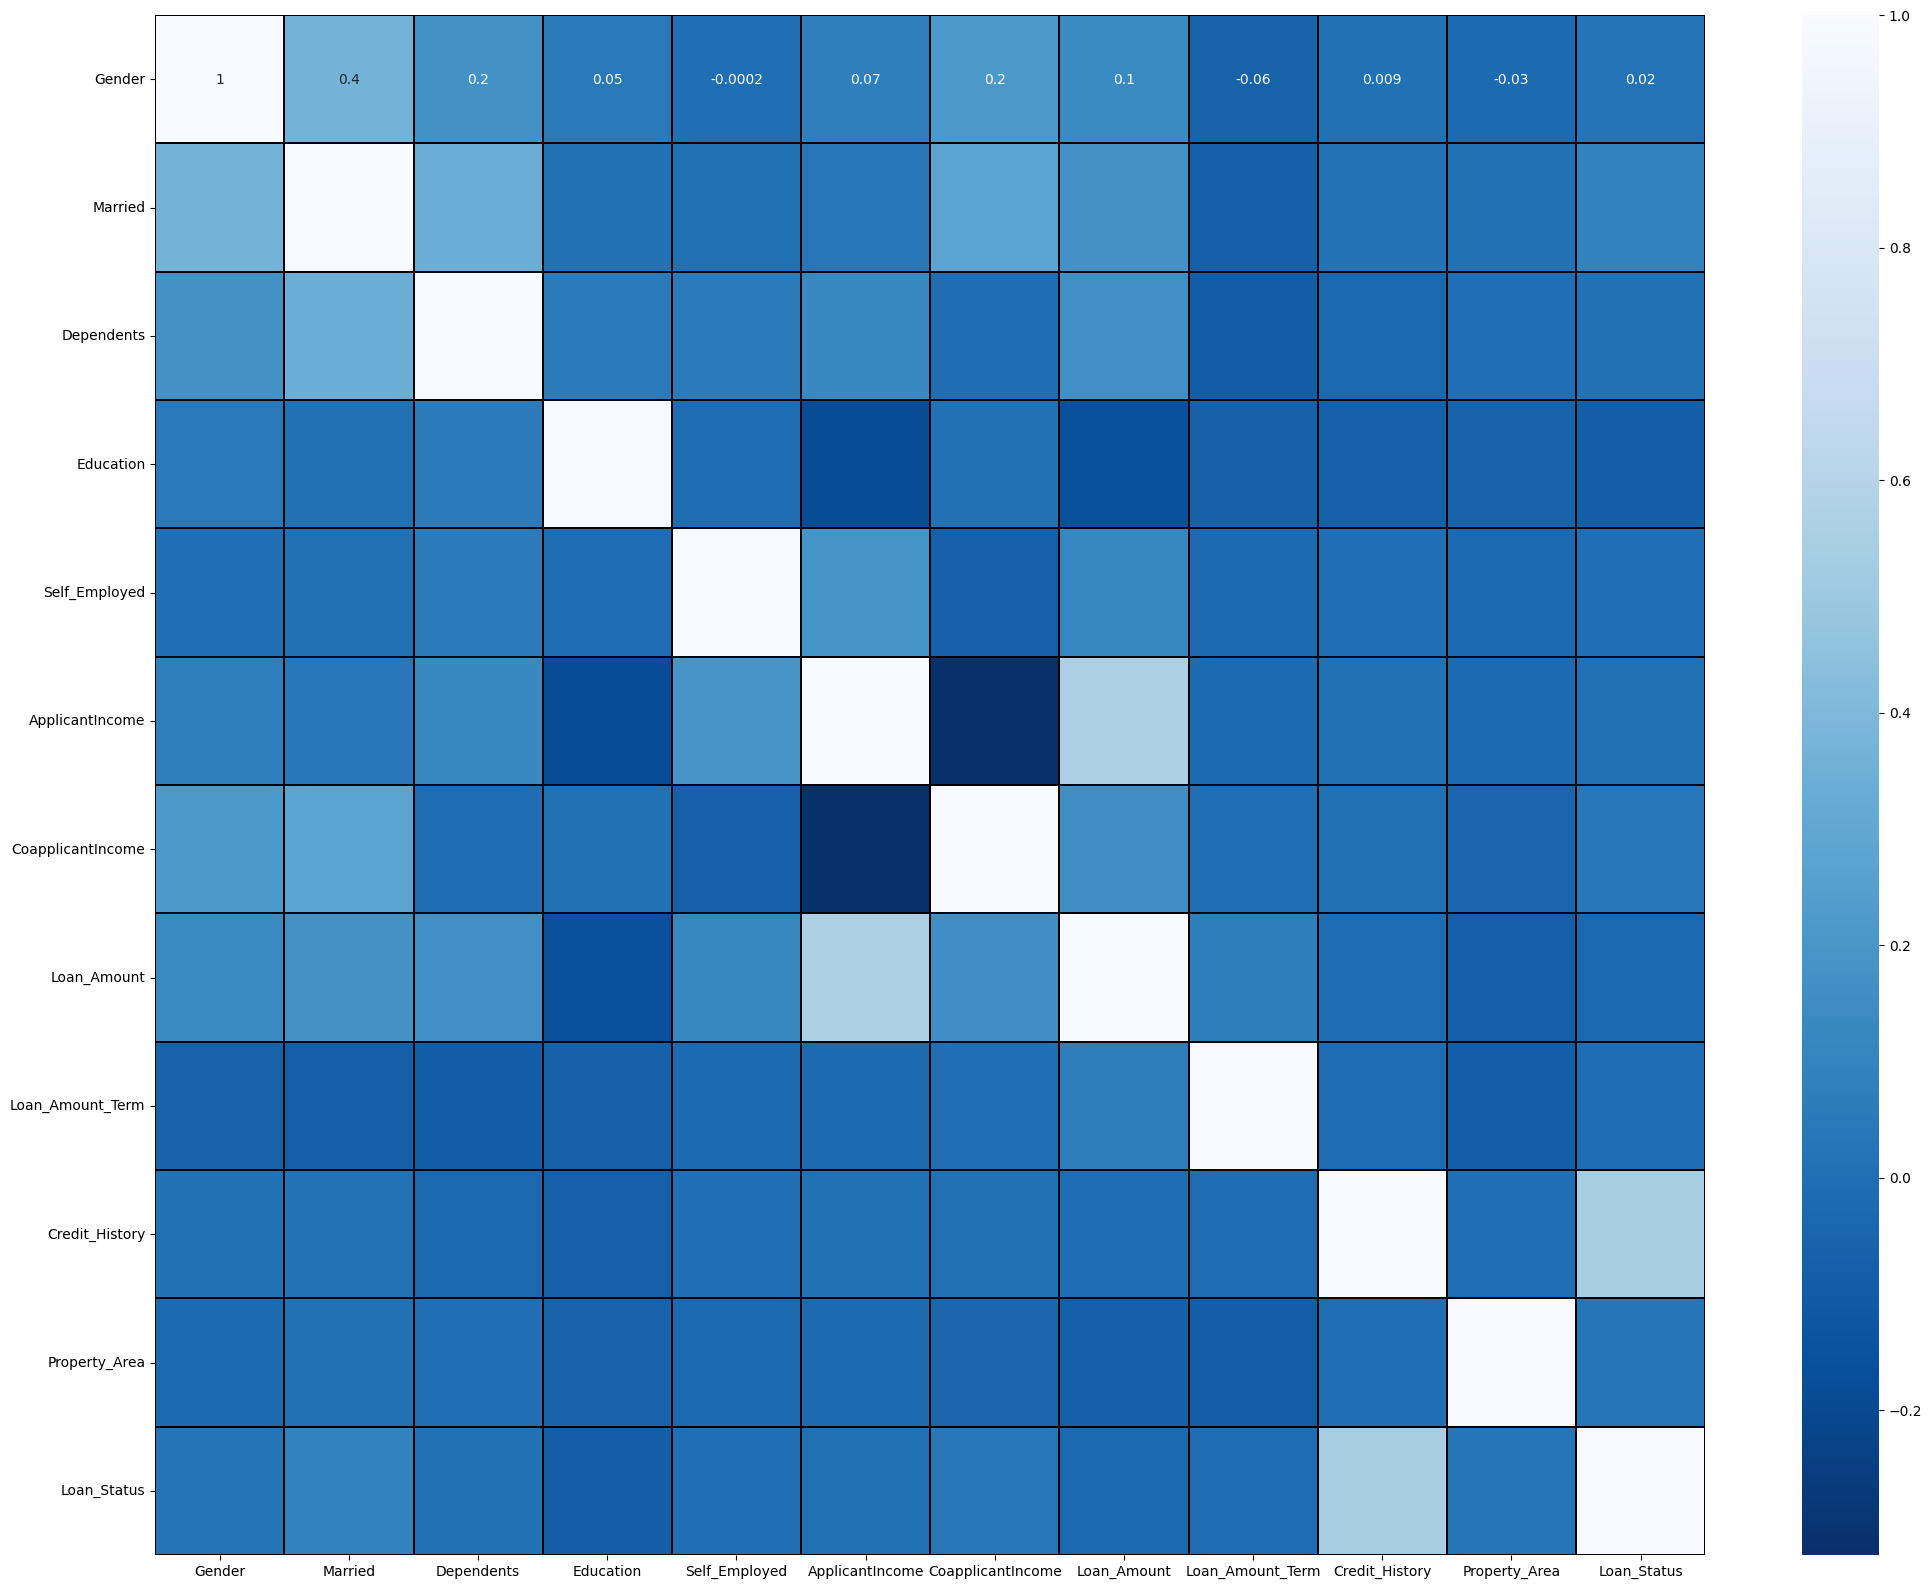

In [46]:
#Visualization the correlation matrix by plotting the window 
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='Black', annot= True,cmap="Blues_r")
plt.yticks(rotation =0);
plt.show()

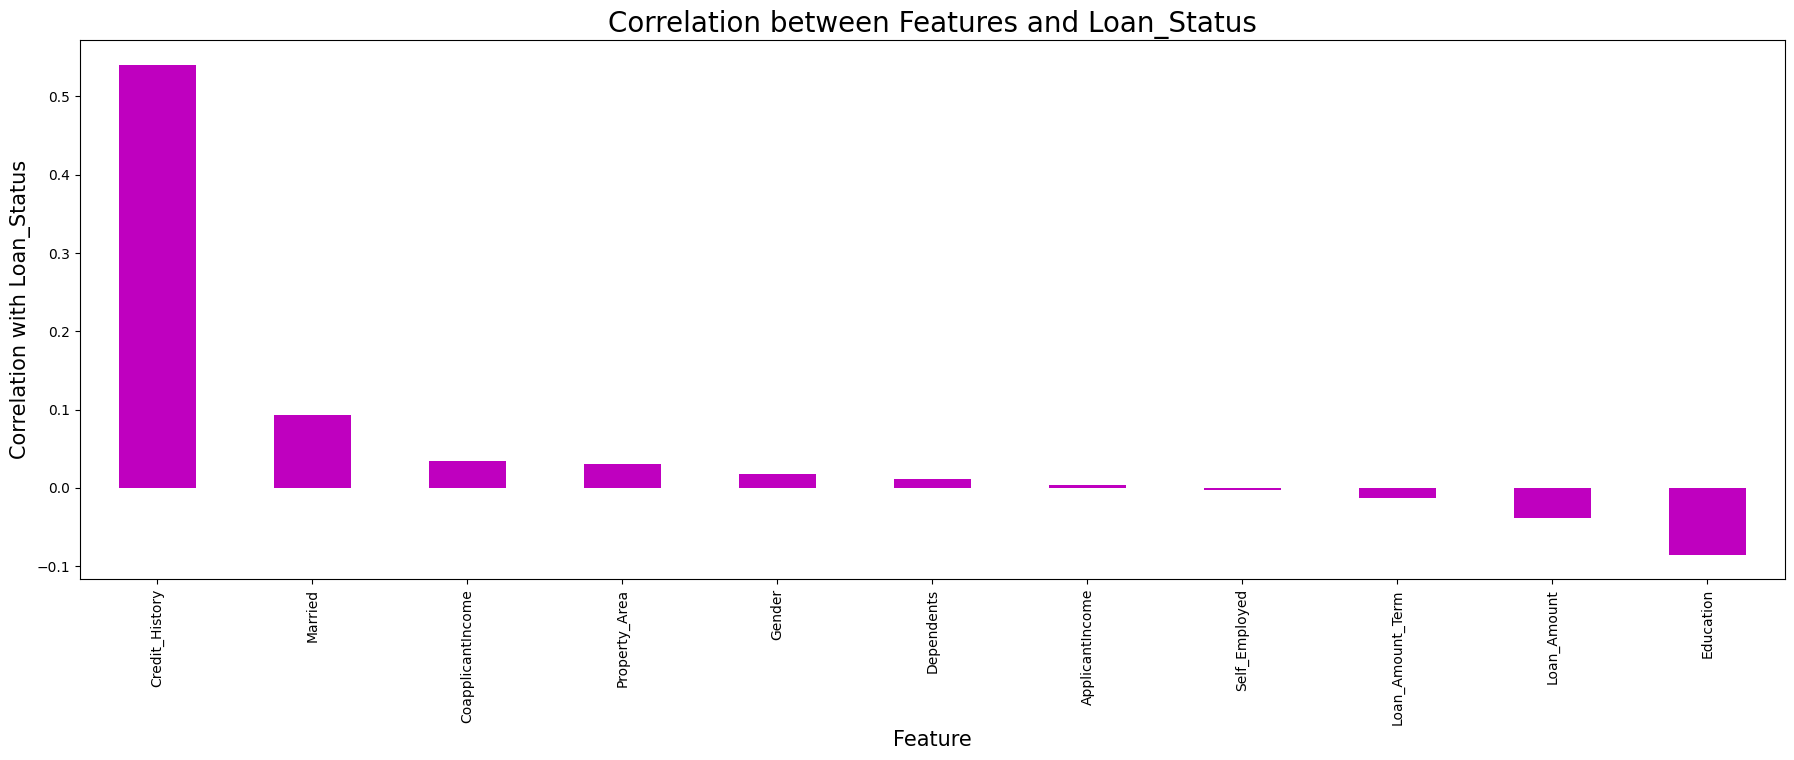

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 7))

# Sort correlation values of 'Churn' with other features, exclude 'Churn', and plot as a bar chart
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='m')

plt.xlabel('Feature', fontsize=15)  # Set label for x-axis
plt.ylabel('Correlation with Loan_Status', fontsize=15)  # Set label for y-axis
plt.title('Correlation between Features and Loan_Status', fontsize=20)  # Set plot title

plt.show()  # Display the bar plot


In [48]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']


In [49]:
# Feature scaling using standard scaralization

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x
# now we have scaled the features by standard scaler to remove the biasness in feature , we do not scaled Target in any case

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472814,0.727103,0.252172,-0.528913,-0.392970,0.023474,0.559588,-0.091177,0.277243,0.412125,-1.317053
1,0.472814,0.727103,-0.738736,-0.528913,2.544722,-0.532037,-1.055038,-1.259387,0.277243,0.412125,1.225793
2,0.472814,0.727103,-0.738736,1.890668,-0.392970,-0.710225,0.819034,-0.216674,0.277243,0.412125,1.225793
3,0.472814,-1.375322,-0.738736,-0.528913,-0.392970,0.419711,-1.055038,0.102046,0.277243,0.412125,1.225793
4,0.472814,0.727103,1.243081,-0.528913,2.544722,0.265168,1.215960,1.546389,0.277243,0.412125,1.225793
...,...,...,...,...,...,...,...,...,...,...,...
608,-2.114997,-1.375322,-0.738736,-0.528913,-0.392970,-0.573183,-1.055038,-1.142878,0.277243,0.412125,-1.317053
609,0.472814,0.727103,2.233989,-0.528913,-0.392970,-0.128227,-1.055038,-1.986313,-2.236721,0.412125,-1.317053
610,0.472814,0.727103,0.252172,-0.528913,-0.392970,0.899205,-0.180037,1.412335,0.277243,0.412125,1.225793
611,0.472814,0.727103,1.243081,-0.528913,-0.392970,0.794213,-1.055038,0.703034,0.277243,0.412125,1.225793


In [50]:
# N0w checking Variance inflation factor (VIF) in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor (x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

# VIF  value says how each feature corealted to remaining  feature of the table, like see below gender columns value is almost one 
# means gender coulmn is not crealted with any coulmn 
# there is no mulitcolinearity in gender column 


# if there are one or more coulmn in which has the highest values then we can drop it

,VIF_Values,Features
0,1.199710,Gender
1,1.357849,Married
2,1.178283,Dependents
3,1.069671,Education
4,1.041030,Self_Employed
5,2.041991,ApplicantIncome
6,1.531245,CoapplicantIncome
7,1.849756,Loan_Amount
8,1.041057,Loan_Amount_Term
9,1.008452,Credit_History


In [51]:
y.value_counts()

Loan_Status
1.0    421
0.0    192
Name: count, dtype: int64

In [ ]:
# y data is imbalanced hence we will use oversampling method to balance the target data

In [52]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
x1
y1

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
837    0.0
838    0.0
839    0.0
840    0.0
841    0.0
Name: Loan_Status, Length: 842, dtype: float64

In [53]:
# checking value count from target column 
y.value_counts()

Loan_Status
1.0    421
0.0    192
Name: count, dtype: int64

In [54]:
y1.value_counts() # see below the rows are now balanced

Loan_Status
0.0    421
1.0    421
Name: count, dtype: int64

In [ ]:
# Model building

In [55]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    Pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,Pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy is : ",maxAccu,"at random state : ",maxRS)

Best Accuracy is :  0.9053254437869822 at random state :  131


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=maxRS)

In [57]:
# Random Forest classifier 

# Checking accuracy for RandoForestClassifier 

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
PredRFC=RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))

0.9171597633136095
[[81  8]
 [ 6 74]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        89
         1.0       0.90      0.93      0.91        80

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169



In [60]:
# Logistic Regresion
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
PredLR=LR.predict(x_test)
print(accuracy_score(y_test,PredLR))
print(confusion_matrix(y_test,PredLR))
print(classification_report(y_test,PredLR))


0.7337278106508875
[[49 40]
 [ 5 75]]
              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69        89
         1.0       0.65      0.94      0.77        80

    accuracy                           0.73       169
   macro avg       0.78      0.74      0.73       169
weighted avg       0.79      0.73      0.73       169



In [61]:
# Extra Tree Classfier 
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
PredET=RFC.predict(x_test)
print(accuracy_score(y_test,PredET))
print(confusion_matrix(y_test,PredET))
print(classification_report(y_test,PredET))


0.9171597633136095
[[81  8]
 [ 6 74]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        89
         1.0       0.90      0.93      0.91        80

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169



In [62]:
# Cross Vaidation method

from sklearn.model_selection import cross_val_score


In [63]:
# checking CV score for Randm Forest

score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredRFC)-score.mean())

[0.77514793 0.74556213 0.85714286 0.85714286 0.91071429]
0.8291420118343196
Difference between Accuracy score and cross validation score is :  0.08801775147928992


In [64]:
# checking CV score for Logistic Regression

score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredLR)-score.mean())

[0.68639053 0.75147929 0.68452381 0.64285714 0.73214286]
0.6994787264018033
Difference between Accuracy score and cross validation score is :  0.03424908424908424


In [ ]:
# So Logistic regression is our best model as Difference between Accuracy score and cross validation score isleast

In [ ]:
# Hypertuning

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

In [66]:

# Initialize the logistic regression model
LR = LogisticRegression()

# Perform grid search with cross-validation
gscv = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [67]:
# Get the best parameters
best_params = gscv.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_LR = LogisticRegression(**best_params)
best_LR.fit(x_train, y_train)


Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [68]:

# Make predictions
Pred_best_LR = best_LR.predict(x_test)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, Pred_best_LR))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, Pred_best_LR))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, Pred_best_LR))



Accuracy Score: 0.727810650887574
Confusion Matrix:
 [[44 45]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.49      0.66        89
         1.0       0.64      0.99      0.77        80

    accuracy                           0.73       169
   macro avg       0.81      0.74      0.72       169
weighted avg       0.82      0.73      0.71       169



In [69]:
# ploting ROC AUC curve 
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve

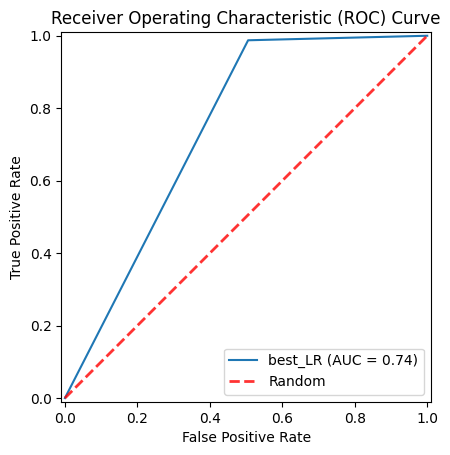

In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming `pred` is your model's predictions and `y_test` is the actual labels
fpr, tpr, thresholds = metrics.roc_curve(y_test, Pred_best_LR)

# Calculate the AUC (Area Under Curve) for ROC
roc_auc = metrics.auc(fpr, tpr)

# Create an ROC Curve plot using RocCurveDisplay
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="best_LR")

# Plot the ROC Curve
display.plot()

# Add the diagonal line (representing random guess) to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [71]:
#Saving the Model

In [73]:
import joblib
joblib.dump(best_LR,'Loan.pkl')


['Loan.pkl']

In [ ]:
#Prdicting the saved model

In [74]:
# Lets load the saved model and get the prediction 

model=joblib.load('Loan.pkl')

# prediction

Prediction=model.predict(x_test)

Prediction
    

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [75]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
164,1.0,0.0
165,1.0,0.0
166,1.0,0.0
167,1.0,1.0


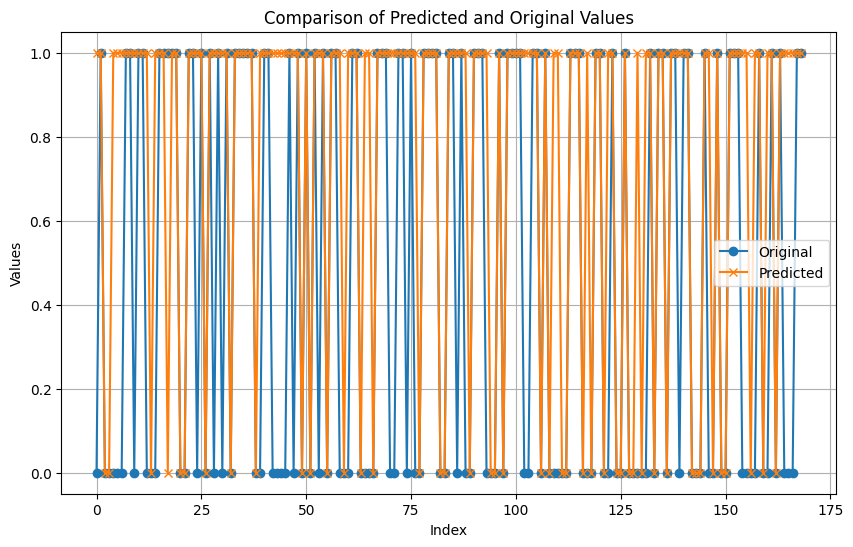

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Original'], label='Original', marker='o')
plt.plot(df.index, df['Predicted'], label='Predicted', marker='x')
plt.title('Comparison of Predicted and Original Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()